https://github.com/frodokramer00/CompSci.git

The work have been distributed equally between all members 33% for each, in each part.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random

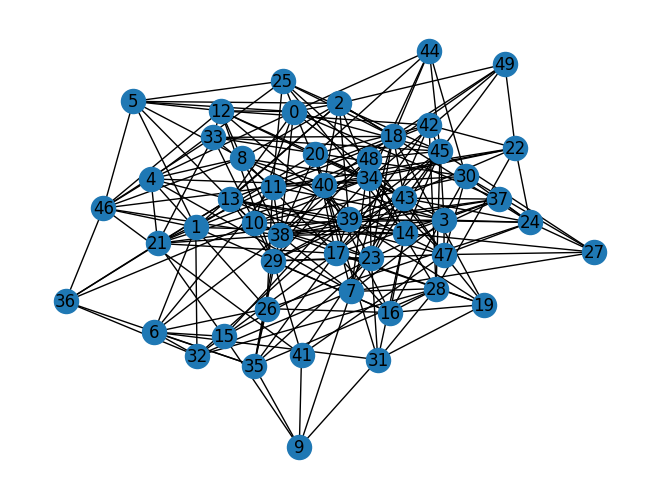

In [9]:
def generate_random_network(N,P):
    G=nx.erdos_renyi_graph(N,P)
    return G

def visualize_network(G):
    nx.draw(G, with_labels=True)
    plt.show()
N = 50
P = 0.2

random_network = generate_random_network(N,P)
visualize_network(random_network)


Calculate the probability

In [14]:
L=P*(N*(N-1))/2
k=P*(N-1)

L,k


(245.0, 9.8)